In [419]:
import numpy as np
import pandas as pd
from datetime import date
import random
import matplotlib.pyplot as plt
%matplotlib inline
import lifelines
pd.options.mode.chained_assignment = None


<a id='handsondata'></a>
<div class=" alert alert-info">
    <b> Tip when reading large csv file</b></div>

In [420]:
#With this code, the Dtype is 'object'. "object" is the worst possible type for memory usage and efficiency.
#covid = pd.read_csv(
#    '/coursedata/covid19_data_22022021.csv')
#covid.head()
#covid.info()

In [421]:
import re

In [422]:
covid = pd.read_csv(
   '/coursedata/covid19_data_22022021.csv')
covid.head()
covid.info()

/opt/conda/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (1,9,10,12,13,14,15,16,17,19,20,21,22,23,24,25,26,27,28,31,32) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 572679 entries, 0 to 572678
Data columns (total 33 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        572679 non-null  object 
 1   age                       572679 non-null  object 
 2   sex                       572679 non-null  object 
 3   city                      524584 non-null  object 
 4   province                  564785 non-null  object 
 5   country                   572635 non-null  object 
 6   latitude                  572679 non-null  float64
 7   longitude                 572679 non-null  float64
 8   geo_resolution            572679 non-null  object 
 9   date_onset_symptoms       260311 non-null  object 
 10  date_admission_hospital   9201 non-null    object 
 11  date_confirmation         572410 non-null  object 
 12  symptoms                  1565 non-null    object 
 13  lives_in_Wuhan            1626 non-null    o

![figure](object_dtype.png)

In [423]:
covid = pd.read_csv('/coursedata/covid19_data_22022021.csv',
        dtype=dict(sex='category',
                   age='string',
                   city='category',
                    province='category',
                    country='category',
                    geo_resolution='category',
                    date_onset_symptoms='category',
                    date_admission_hospital='category',
                    symptoms='string',
                    additional_information='string',
                    date_death_or_discharge='category',
                    travel_history_dates='string',
                    notes_for_discussion='string',
                    latitude=float,
                    longitude=float,
                    lives_in_Wuhan='category',
                    travel_history_location='category',
                    reported_market_exposure='category',
                    chronic_disease_binary='category',
                    chronic_disease='category',
                    source='category',
                    sequence_available='category',
                    outcome='category',
                    #sequence_available=bool,
                    location='category',
                    admin3='category',
                    admin2='category',
                    admin1='category',
                    country_new='category',
                    travel_history_binary='category',
                    data_moderator_initials='category'
                    ),)

In [424]:
#Memory usage has been improved significantly!
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 572679 entries, 0 to 572678
Data columns (total 33 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   ID                        572679 non-null  object  
 1   age                       572679 non-null  string  
 2   sex                       572679 non-null  category
 3   city                      524584 non-null  category
 4   province                  564785 non-null  category
 5   country                   572635 non-null  category
 6   latitude                  572679 non-null  float64 
 7   longitude                 572679 non-null  float64 
 8   geo_resolution            572679 non-null  category
 9   date_onset_symptoms       260311 non-null  category
 10  date_admission_hospital   9201 non-null    category
 11  date_confirmation         572410 non-null  object  
 12  symptoms                  1565 non-null    string  
 13  lives_in_Wuhan            162

In [425]:
#Outcome values
a=covid.outcome.unique()
a=a.tolist()
print(a)

['death', 'discharge', nan, 'discharged', 'Discharged', 'not hospitalized', 'recovered', 'recovering at home 03.03.2020', 'released from quarantine', 'severe', 'stable', 'died', 'Death', 'dead', 'Symptoms only improved with cough. Currently hospitalized for follow-up.', 'treated in an intensive care unit (14.02.2020)', 'Alive', 'Dead', 'Recovered', 'Stable', 'Died', 'Deceased', 'stable condition', 'Under treatment', 'Receiving Treatment', 'severe illness', 'critical condition', 'Hospitalized']


In [426]:
covid.head()

,ID,age,sex,city,province,country,latitude,longitude,geo_resolution,date_onset_symptoms,...,date_death_or_discharge,notes_for_discussion,location,admin3,admin2,admin1,country_new,admin_id,data_moderator_initials,travel_history_binary
0,000-1-10,78,male,Vo Euganeo,Veneto,Italy,45.297748,11.658382,point,NaN,...,22.02.2020,<NA>,Vo' Euganeo,NaN,NaN,Veneto,Italy,8954.0,NaN,NaN
1,000-1-100,61,female,NaN,NaN,Singapore,1.353460,103.815100,admin0,NaN,...,17.02.2020,<NA>,NaN,NaN,NaN,NaN,Singapore,200.0,NaN,NaN
2,000-1-10021,66,male,"Zhenlai County, Baicheng City",Jilin,China,45.948140,123.439600,admin3,NaN,...,NaN,https://www.google.com/maps/place/Zhenlai+Coun...,NaN,Zhenlai County,Baicheng City,Jilin,China,10096.0,NaN,NaN
3,000-1-10022,27,female,"Longshan District, Liaoyuan City",Jilin,China,42.858020,125.152100,admin3,NaN,...,NaN,<NA>,NaN,Longshan District,Liaoyuan City,Jilin,China,5676.0,NaN,NaN
4,000-1-10023,17,male,"Gongzhuling City, Siping City",Jilin,China,43.783530,124.672900,admin3,NaN,...,NaN,<NA>,NaN,Gongzhuling City,Siping City,Jilin,China,3637.0,NaN,NaN


In [427]:
# covid['date_death_or_discharge'].max()

# Your time to ROCK! Remember to upload the jupyter notebook file to the submission box together with your report. Otherwise you will only get 50% of your points.

In [428]:
# Start your excellent code here! 

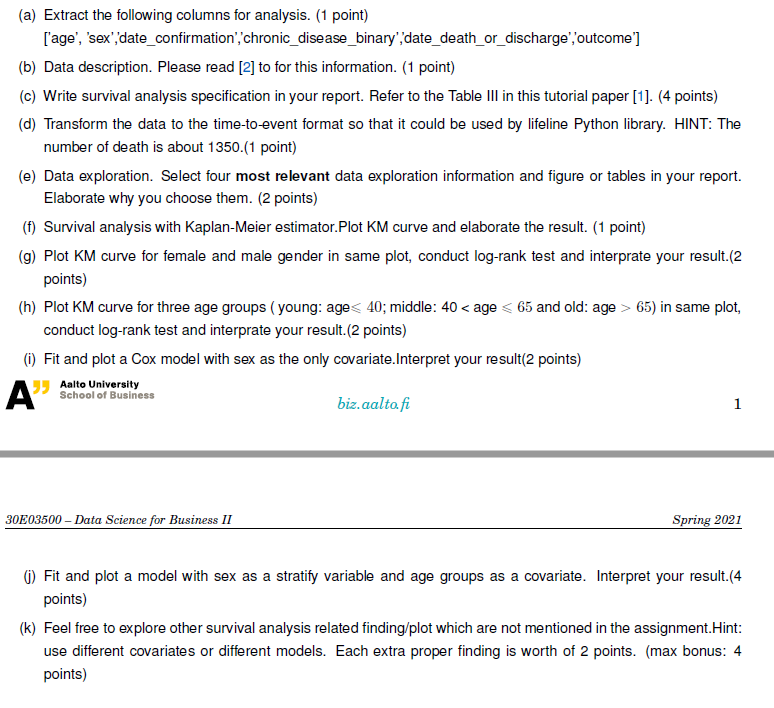

In [429]:

covid1=covid[['age','sex','date_confirmation','chronic_disease_binary','date_death_or_discharge','outcome']]
# covid1.dropna(subset = ["date_confirmation"], inplace=True)
# covid1.dropna(subset = ["date_death_or_discharge"], inplace=True)
# covid1.dropna(subset = ["outcome"], inplace=True)
# covid1["date_death_or_discharge"].fillna("22.02.2021", inplace =True)

covid1.head(100)



,age,sex,date_confirmation,chronic_disease_binary,date_death_or_discharge,outcome
0,78,male,21.02.2020,False,22.02.2020,death
1,61,female,14.02.2020,False,17.02.2020,discharge
2,66,male,07.02.2020,False,NaN,NaN
3,27,female,07.02.2020,False,NaN,NaN
4,17,male,07.02.2020,False,NaN,NaN
...,...,...,...,...,...,...
95,26,male,13.02.2020,False,NaN,NaN
96,50-59,male,13.02.2020,False,NaN,NaN
97,70-79,male,13.02.2020,False,NaN,NaN
98,30,male,14.02.2020,False,NaN,NaN


## The information for time-to-event:
|  Information| Time-to-Event  |  
|:---|:---|
|  Event| Covid19 caused death |  
|  Time origin| duration |  
|  Time scale|  days|  
|  Censoring rule| withdrawn at the end of the study(22.02.2021) |  
|  Survival time| time from presentation until death or censored |  


In [430]:
#Assign same values to One "dead"  ['death', 'discharge', nan, 'discharged', 'Discharged', 'not hospitalized', 'recovered', 'recovering at home 03.03.2020', 'released from quarantine', 'severe', 'stable', 'died', 'Death', 'dead', 'Symptoms only improved with cough. Currently hospitalized for follow-up.', 'treated in an intensive care unit (14.02.2020)', 'Alive', 'Dead', 'Recovered', 'Stable', 'Died', 'Deceased', 'stable condition', 'Under treatment', 'Receiving Treatment', 'severe illness', 'critical condition', 'Hospitalized']
covid1['Outcome'] = covid1.outcome.astype(str)
covid1['Outcome'] =covid1.Outcome.str.lower()
covid1['Outcome']=covid1.Outcome.replace(["died","deceased","death","death"], "dead")
#covid1['Outcome']=covid1.loc[covid1.Outcome == "died"] = "dead"
# covid1['Outcome']=covid1.loc[covid1.outcome == "deceased", 'outcome'] = "dead"
# covid1['Outcome']=covid1.loc[covid1.outcome == "death", 'outcome'] = "dead"
# covid1['Outcome']=covid1.loc[covid1.outcome == "death", 'outcome'] = "dead"
# covid1['Outcome']=covid1.loc[covid1.outcome == "died", 'outcome'] = "dead"
covid1

,age,sex,date_confirmation,chronic_disease_binary,date_death_or_discharge,outcome,Outcome
0,78,male,21.02.2020,False,22.02.2020,death,dead
1,61,female,14.02.2020,False,17.02.2020,discharge,discharge
2,66,male,07.02.2020,False,NaN,NaN,nan
3,27,female,07.02.2020,False,NaN,NaN,nan
4,17,male,07.02.2020,False,NaN,NaN,nan
...,...,...,...,...,...,...,...
572674,52.0,female,17.05.2020,False,NaN,NaN,nan
572675,52.0,female,17.05.2020,False,NaN,NaN,nan
572676,52.0,female,17.05.2020,False,NaN,NaN,nan
572677,52.0,male,17.05.2020,False,NaN,NaN,nan


In [431]:
item_counts = covid1["Outcome"].value_counts()
print(item_counts)

nan                                                                         539078
hospitalized                                                                 27908
recovered                                                                     3795
dead                                                                          1368
discharge                                                                      165
stable condition                                                               109
stable                                                                          97
discharged                                                                      94
alive                                                                           37
under treatment                                                                 13
released from quarantine                                                         2
treated in an intensive care unit (14.02.2020)                                   2
symp

In [432]:
covid1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 572679 entries, 0 to 572678
Data columns (total 7 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   age                      572679 non-null  string  
 1   sex                      572679 non-null  category
 2   date_confirmation        572410 non-null  object  
 3   chronic_disease_binary   572679 non-null  category
 4   date_death_or_discharge  3094 non-null    category
 5   outcome                  33601 non-null   category
 6   Outcome                  572679 non-null  object  
dtypes: category(4), object(2), string(1)
memory usage: 15.8+ MB


In [433]:
# covid1['date_confirmation'] = covid1['date_confirmation'].astype('datetime64[ns]', errors='ignore')
covid1['date_death_or_discharge_N'] = pd.to_datetime(covid1['date_death_or_discharge'])
covid1['date_confirmation']=pd.to_datetime(covid1['date_confirmation'], errors='coerce')
# covid1['date_confirmation']=pd.to_datetime(covid1['date_confirmation'],  format='%d%m%y', infer_datetime_format=True)

In [434]:
covid1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 572679 entries, 0 to 572678
Data columns (total 8 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   age                        572679 non-null  string        
 1   sex                        572679 non-null  category      
 2   date_confirmation          572405 non-null  datetime64[ns]
 3   chronic_disease_binary     572679 non-null  category      
 4   date_death_or_discharge    3094 non-null    category      
 5   outcome                    33601 non-null   category      
 6   Outcome                    572679 non-null  object        
 7   date_death_or_discharge_N  3094 non-null    datetime64[ns]
dtypes: category(4), datetime64[ns](2), object(1), string(1)
memory usage: 20.2+ MB


In [435]:
covid1["date_death_or_discharge_N"]=covid1["date_death_or_discharge_N"].fillna('22.02.2021',downcast=False)


In [436]:
covid1['date_death_or_discharge_N'] = pd.to_datetime(covid1['date_death_or_discharge_N'])

In [437]:
covid1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 572679 entries, 0 to 572678
Data columns (total 8 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   age                        572679 non-null  string        
 1   sex                        572679 non-null  category      
 2   date_confirmation          572405 non-null  datetime64[ns]
 3   chronic_disease_binary     572679 non-null  category      
 4   date_death_or_discharge    3094 non-null    category      
 5   outcome                    33601 non-null   category      
 6   Outcome                    572679 non-null  object        
 7   date_death_or_discharge_N  572679 non-null  datetime64[ns]
dtypes: category(4), datetime64[ns](2), object(1), string(1)
memory usage: 20.2+ MB


In [438]:
covid1['duration']=(covid1['date_death_or_discharge_N']-covid1['date_confirmation']).dt.days
covid1['duration']=covid1['duration'].abs()

In [439]:
# item_counts1 = covid1['date_confirmation'].value_counts()
# print(item_counts1)

In [440]:
covid1

,age,sex,date_confirmation,chronic_disease_binary,date_death_or_discharge,outcome,Outcome,date_death_or_discharge_N,duration
0,78,male,2020-02-21,False,22.02.2020,death,dead,2020-02-22,1.0
1,61,female,2020-02-14,False,17.02.2020,discharge,discharge,2020-02-17,3.0
2,66,male,2020-07-02,False,NaN,NaN,nan,2021-02-22,235.0
3,27,female,2020-07-02,False,NaN,NaN,nan,2021-02-22,235.0
4,17,male,2020-07-02,False,NaN,NaN,nan,2021-02-22,235.0
...,...,...,...,...,...,...,...,...,...
572674,52.0,female,2020-05-17,False,NaN,NaN,nan,2021-02-22,281.0
572675,52.0,female,2020-05-17,False,NaN,NaN,nan,2021-02-22,281.0
572676,52.0,female,2020-05-17,False,NaN,NaN,nan,2021-02-22,281.0
572677,52.0,male,2020-05-17,False,NaN,NaN,nan,2021-02-22,281.0


In [441]:
item_counts2 = covid1["Outcome"].value_counts()
print(item_counts2)

nan                                                                         539078
hospitalized                                                                 27908
recovered                                                                     3795
dead                                                                          1368
discharge                                                                      165
stable condition                                                               109
stable                                                                          97
discharged                                                                      94
alive                                                                           37
under treatment                                                                 13
released from quarantine                                                         2
treated in an intensive care unit (14.02.2020)                                   2
symp

In [442]:
ohe_features = ['Outcome']
covid1 = pd.get_dummies(covid1, columns=ohe_features)

# 

In [444]:
covid1['is_dead'] = covid1['Outcome_dead'] == 1
covid1

,age,sex,date_confirmation,chronic_disease_binary,date_death_or_discharge,outcome,date_death_or_discharge_N,duration,Outcome_alive,Outcome_critical condition,...,Outcome_recovering at home 03.03.2020,Outcome_released from quarantine,Outcome_severe,Outcome_severe illness,Outcome_stable,Outcome_stable condition,Outcome_symptoms only improved with cough. currently hospitalized for follow-up.,Outcome_treated in an intensive care unit (14.02.2020),Outcome_under treatment,is_dead
0,78,male,2020-02-21,False,22.02.2020,death,2020-02-22,1.0,0,0,...,0,0,0,0,0,0,0,0,0,True
1,61,female,2020-02-14,False,17.02.2020,discharge,2020-02-17,3.0,0,0,...,0,0,0,0,0,0,0,0,0,False
2,66,male,2020-07-02,False,NaN,NaN,2021-02-22,235.0,0,0,...,0,0,0,0,0,0,0,0,0,False
3,27,female,2020-07-02,False,NaN,NaN,2021-02-22,235.0,0,0,...,0,0,0,0,0,0,0,0,0,False
4,17,male,2020-07-02,False,NaN,NaN,2021-02-22,235.0,0,0,...,0,0,0,0,0,0,0,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
572674,52.0,female,2020-05-17,False,NaN,NaN,2021-02-22,281.0,0,0,...,0,0,0,0,0,0,0,0,0,False
572675,52.0,female,2020-05-17,False,NaN,NaN,2021-02-22,281.0,0,0,...,0,0,0,0,0,0,0,0,0,False
572676,52.0,female,2020-05-17,False,NaN,NaN,2021-02-22,281.0,0,0,...,0,0,0,0,0,0,0,0,0,False
572677,52.0,male,2020-05-17,False,NaN,NaN,2021-02-22,281.0,0,0,...,0,0,0,0,0,0,0,0,0,False


In [445]:
covid2=covid1[['age','sex','duration','chronic_disease_binary','is_dead']]

In [446]:
covid2

,age,sex,duration,chronic_disease_binary,is_dead
0,78,male,1.0,False,True
1,61,female,3.0,False,False
2,66,male,235.0,False,False
3,27,female,235.0,False,False
4,17,male,235.0,False,False
...,...,...,...,...,...
572674,52.0,female,281.0,False,False
572675,52.0,female,281.0,False,False
572676,52.0,female,281.0,False,False
572677,52.0,male,281.0,False,False


In [447]:
# covid2['duration']=covid2['duration'].astype('timedelta64[D]')

In [448]:
covid2['duration'].max()


417.0

In [449]:
# covid2['age_combined']= covid2['age'].str.contains('-', regex=False)
b=covid2['age'].str.split("(?<=\\D)(?=\\d)|(?<=\\d)(?=\\D)",expand=True)
# str.split("(?<=\\D)(?=\\d)|(?<=\\d)(?=\\D)")
# covid2['age']=b[0]

In [450]:
b.head()

,0,1,2
0,78,<NA>,<NA>
1,61,<NA>,<NA>
2,66,<NA>,<NA>
3,27,<NA>,<NA>
4,17,<NA>,<NA>


In [451]:
covid2['age']=b[0].astype(float)

In [452]:
covid2

,age,sex,duration,chronic_disease_binary,is_dead
0,78.0,male,1.0,False,True
1,61.0,female,3.0,False,False
2,66.0,male,235.0,False,False
3,27.0,female,235.0,False,False
4,17.0,male,235.0,False,False
...,...,...,...,...,...
572674,52.0,female,281.0,False,False
572675,52.0,female,281.0,False,False
572676,52.0,female,281.0,False,False
572677,52.0,male,281.0,False,False


In [453]:
covid2['duration'].isnull().values.any()

True

In [454]:
covid2.isnull().sum()

age                         0
sex                         0
duration                  274
chronic_disease_binary      0
is_dead                     0
dtype: int64

In [455]:
covid2.head()

,age,sex,duration,chronic_disease_binary,is_dead
0,78.0,male,1.0,False,True
1,61.0,female,3.0,False,False
2,66.0,male,235.0,False,False
3,27.0,female,235.0,False,False
4,17.0,male,235.0,False,False


In [456]:
covid2.dropna(inplace=True)

In [457]:
covid2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 572405 entries, 0 to 572678
Data columns (total 5 columns):
 #   Column                  Non-Null Count   Dtype   
---  ------                  --------------   -----   
 0   age                     572405 non-null  float64 
 1   sex                     572405 non-null  category
 2   duration                572405 non-null  float64 
 3   chronic_disease_binary  572405 non-null  category
 4   is_dead                 572405 non-null  bool    
dtypes: bool(1), category(2), float64(2)
memory usage: 14.7 MB


/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Number of patients')

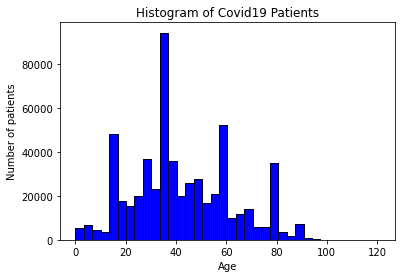

In [458]:
import matplotlib.pyplot as plt
import seaborn as sns

# matplotlib histogram
plt.hist(covid2['age'], color = 'blue', edgecolor = 'black',
         bins = int(180/5))

# seaborn histogram
sns.distplot(covid2['age'], hist=True, kde=False, 
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Histogram of Covid19 Patients')
plt.xlabel('Age')
plt.ylabel('Number of patients')

# Kaplan-Meier 

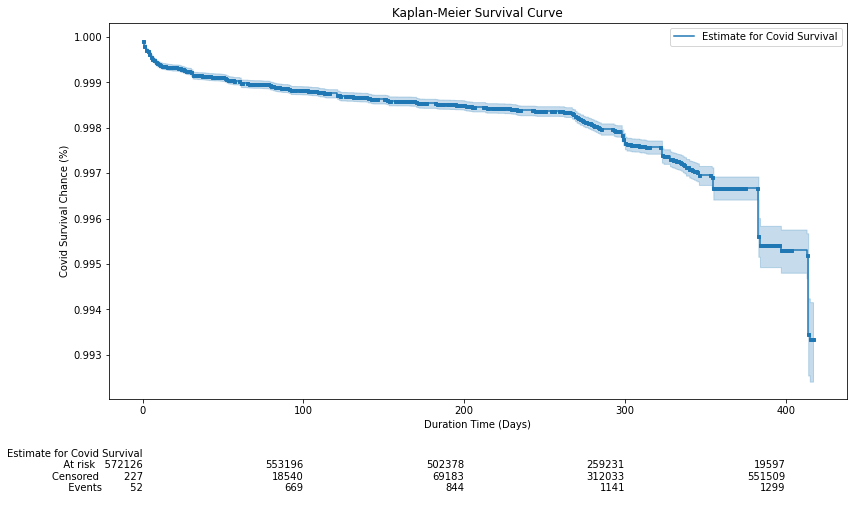

In [459]:
# fitting kmf to the data
days = covid2['duration']
dead= covid2['is_dead']
kmf = lifelines.KaplanMeierFitter()
kmf.fit(days, event_observed=dead, label='Estimate for Covid Survival')

# plotting kmf curve
fig, ax = plt.subplots(figsize=(12,7))
kmf.plot(ax=ax,show_censors=True, censor_styles={'ms': 3, 'marker': 's'},at_risk_counts=True)
ax.set_title('Kaplan-Meier Survival Curve')
ax.set_xlabel('Duration Time (Days)')
ax.set_ylabel('Covid Survival Chance (%)')
plt.show()

In [460]:
covid2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 572405 entries, 0 to 572678
Data columns (total 5 columns):
 #   Column                  Non-Null Count   Dtype   
---  ------                  --------------   -----   
 0   age                     572405 non-null  float64 
 1   sex                     572405 non-null  category
 2   duration                572405 non-null  float64 
 3   chronic_disease_binary  572405 non-null  category
 4   is_dead                 572405 non-null  bool    
dtypes: bool(1), category(2), float64(2)
memory usage: 14.7 MB


In [461]:
kmf.event_table.head(100)

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,279,52,227,572405,572405
1.0,188,61,127,0,572126
2.0,147,47,100,0,571938
3.0,103,24,79,0,571791
4.0,102,30,72,0,571688
...,...,...,...,...,...
102.0,3,1,2,0,553194
103.0,12,3,9,0,553191
104.0,7,1,6,0,553179


In [462]:
covid2['age groups']=covid2['age'].apply(lambda x:'young' if x<=40 else('middle' if x<=65 else 'old'))
#  if n%10 == 0 else ( n**2 if n%2 == 0 else n**3 )

In [463]:
covid2

,age,sex,duration,chronic_disease_binary,is_dead,age groups
0,78.0,male,1.0,False,True,old
1,61.0,female,3.0,False,False,middle
2,66.0,male,235.0,False,False,old
3,27.0,female,235.0,False,False,young
4,17.0,male,235.0,False,False,young
...,...,...,...,...,...,...
572674,52.0,female,281.0,False,False,middle
572675,52.0,female,281.0,False,False,middle
572676,52.0,female,281.0,False,False,middle
572677,52.0,male,281.0,False,False,middle


<AxesSubplot:xlabel='age groups', ylabel='is_dead'>

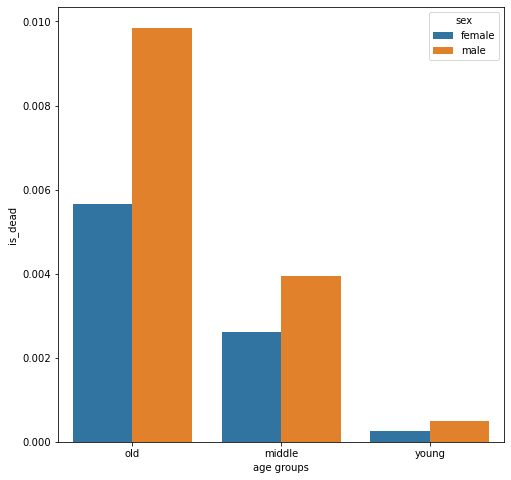

In [464]:
import seaborn as sns
fig, ((ax1))=plt.subplots(figsize=(8,8))
sns.barplot(x='age groups', y='is_dead', data=covid2, ci=None, ax=ax1, hue='sex')

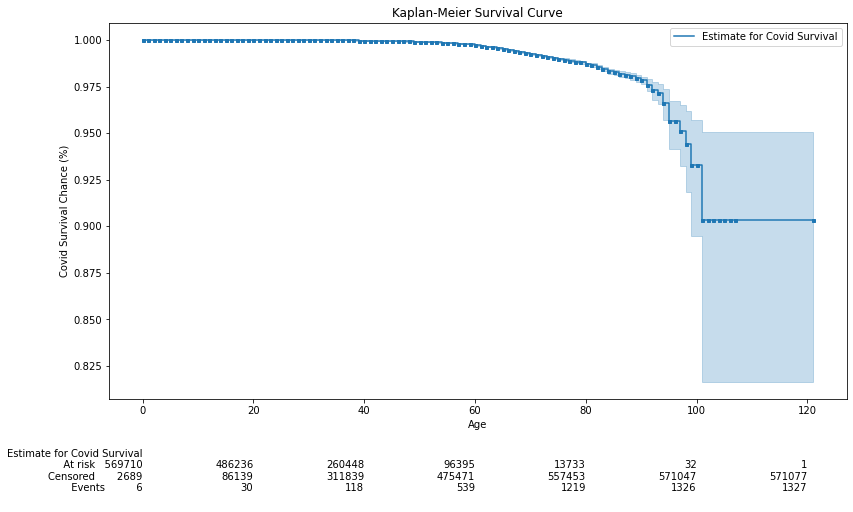

In [465]:
age = covid2['age']
dead= covid2['is_dead']
kmf = lifelines.KaplanMeierFitter()
kmf.fit(age, event_observed=dead, label='Estimate for Covid Survival')

# plotting kmf curve
fig, ax = plt.subplots(figsize=(12,7))
kmf.plot(ax=ax,show_censors=True, censor_styles={'ms': 3, 'marker': 's'},at_risk_counts=True)
ax.set_title('Kaplan-Meier Survival Curve')
ax.set_xlabel('Age')
ax.set_ylabel('Covid Survival Chance (%)')
plt.show()

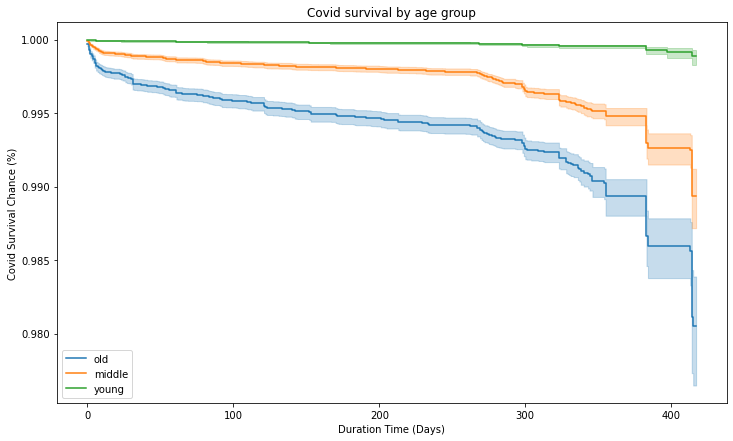

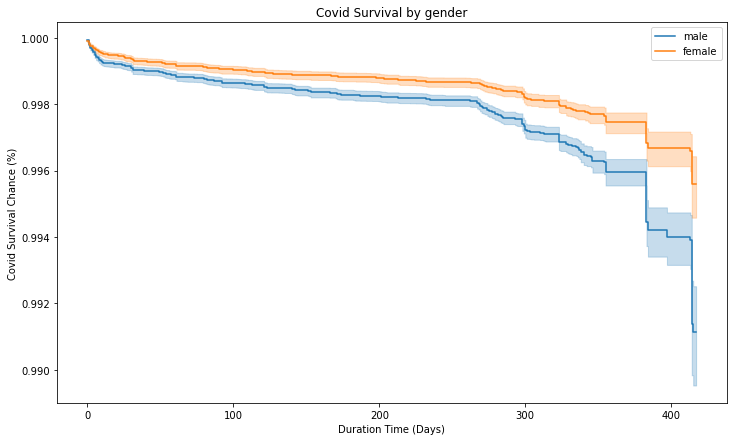

In [466]:
# function for creating Kaplan-Meier curve plots segmented
# by categorical variables
def plot_categorical_survival(feature, t='duration', event='is_dead', df=covid2, ax=None):
    for cat in df[feature].unique():
        idx = df[feature] == cat
        kmf = lifelines.KaplanMeierFitter()
        kmf.fit(df[idx][t], event_observed=df[idx][event], label=cat)
        kmf.plot(ax=ax, label=cat)

# plot by education level
fig_edl, ax_edl = plt.subplots(figsize=(12,7))
plot_categorical_survival(feature='age groups', ax=ax_edl)
ax_edl.set_title('Covid survival by age group')
ax_edl.set_xlabel('Duration Time (Days)')
ax_edl.set_ylabel('Covid Survival Chance (%)')
plt.show()

# plot by gender
fig_gen, ax_gen = plt.subplots(figsize=(12,7))
plot_categorical_survival(feature='sex', ax=ax_gen)
ax_gen.set_title('Covid Survival by gender')
ax_gen.set_xlabel('Duration Time (Days)')
ax_gen.set_ylabel('Covid Survival Chance (%)')
plt.show()

# Log-Rank Test

In [467]:
female = (covid2["sex"] == "female")
T = covid2["duration"]
E = covid2["is_dead"]
kmf.fit(T[female], event_observed=E[female])

from lifelines.statistics import logrank_test

startup_gender_results = logrank_test(T[female], T[~female], E[female], E[~female], alpha=.99)


startup_gender_results.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.99
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
          60.14 <0.005     46.68

In [468]:
covid2['male'] = covid2['sex'] == 'male'

In [469]:
ohe_features = ['age groups']
covid2 = pd.get_dummies(covid2, columns=ohe_features)

In [470]:
covid2

,age,sex,duration,chronic_disease_binary,is_dead,male,age groups_middle,age groups_old,age groups_young
0,78.0,male,1.0,False,True,True,0,1,0
1,61.0,female,3.0,False,False,False,1,0,0
2,66.0,male,235.0,False,False,True,0,1,0
3,27.0,female,235.0,False,False,False,0,0,1
4,17.0,male,235.0,False,False,True,0,0,1
...,...,...,...,...,...,...,...,...,...
572674,52.0,female,281.0,False,False,False,1,0,0
572675,52.0,female,281.0,False,False,False,1,0,0
572676,52.0,female,281.0,False,False,False,1,0,0
572677,52.0,male,281.0,False,False,True,1,0,0


In [471]:
covid2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 572405 entries, 0 to 572678
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype   
---  ------                  --------------   -----   
 0   age                     572405 non-null  float64 
 1   sex                     572405 non-null  category
 2   duration                572405 non-null  float64 
 3   chronic_disease_binary  572405 non-null  category
 4   is_dead                 572405 non-null  bool    
 5   male                    572405 non-null  bool    
 6   age groups_middle       572405 non-null  uint8   
 7   age groups_old          572405 non-null  uint8   
 8   age groups_young        572405 non-null  uint8   
dtypes: bool(2), category(2), float64(2), uint8(3)
memory usage: 36.9 MB


In [472]:
# covid2['chronic_disease_binary']=covid2['chronic_disease_binary'].astype('bool')

In [473]:
CRONIC_features = ['chronic_disease_binary']
covid2 = pd.get_dummies(covid2, columns=CRONIC_features )

In [474]:
covid2['chronic_disease_binary_True'].value_counts()

0    572250
1       155
Name: chronic_disease_binary_True, dtype: int64

In [475]:
covid2=covid2.drop(['age','chronic_disease_binary_False','sex'], axis=1)

In [476]:
covid2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 572405 entries, 0 to 572678
Data columns (total 7 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     572405 non-null  float64
 1   is_dead                      572405 non-null  bool   
 2   male                         572405 non-null  bool   
 3   age groups_middle            572405 non-null  uint8  
 4   age groups_old               572405 non-null  uint8  
 5   age groups_young             572405 non-null  uint8  
 6   chronic_disease_binary_True  572405 non-null  uint8  
dtypes: bool(2), float64(1), uint8(4)
memory usage: 32.0 MB


## 

## 

# Cox Model

In [477]:
# Building training and testing sets
from sklearn.model_selection import train_test_split
random.seed(10)

covid2_train,covid2_test = train_test_split(covid2,test_size=0.35)
startup_cph = lifelines.CoxPHFitter(penalizer=0.1)
startup_cph.fit(covid2_train, duration_col='duration', event_col='is_dead', show_progress=False)
startup_cph.print_summary()

<lifelines.CoxPHFitter: fitted with 372063 total observations, 371179 right-censored observations>
             duration col = 'duration'
                event col = 'is_dead'
                penalizer = 0.1
                 l1 ratio = 0.0
      baseline estimation = breslow
   number of observations = 372063
number of events observed = 884
   partial log-likelihood = -10807.11
         time fit was run = 2021-03-16 21:10:31 UTC

---
                              coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                           
male                          0.01       1.01       0.01            -0.01             0.03                 0.99                 1.03
age groups_middle             0.02       1.02       0.01            -0.01             0.04                 0.99                 1.04
age groups_old                0.06       1.06       0.01             0.03             0.09                 1.03                 1.09
age groups_young             -0.04       0.96       0.01            -0.06            -0.02                 0.94                 0.98
chronic_disease_binary_True   4.39      80.60       0.21             3.98             4.80                53.59               121.22

                                z      p   -log2(p)
covariate                                          
male                         0.92   0.36       1.49
age groups_middle            1.38   0.17       2.58
age groups_old               3.98 <0.005      13.82
age groups_young            -4.05 <0.005      14.28
chronic_disease_binary_True 21.08 <0.005     325.27
---
Concordance = 0.80
Partial AIC = 21624.21
log-likelihood ratio test = 318.94 on 5 df
-log2(p) of ll-ratio test = 219.49

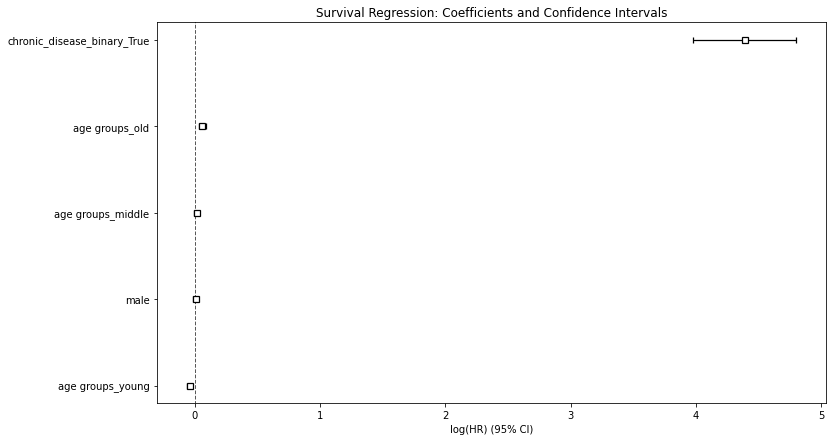

In [478]:
# plotting coefficients
fig_coef, ax_coef = plt.subplots(figsize=(12,7))
ax_coef.set_title('Survival Regression: Coefficients and Confidence Intervals')
startup_cph.plot(ax=ax_coef);

<AxesSubplot:>

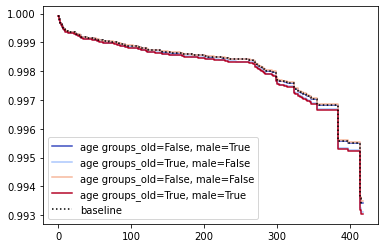

In [479]:
startup_cph.plot_partial_effects_on_outcome(['age groups_old','male'], [[False,True],[True,False],[False,False],[True,True]], [False,True], cmap='coolwarm')

<AxesSubplot:>

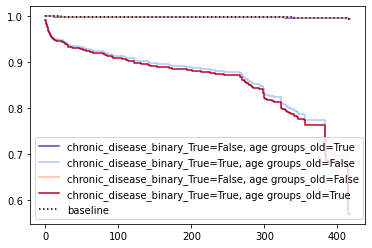

In [480]:
startup_cph.plot_partial_effects_on_outcome(['chronic_disease_binary_True','age groups_old'], [[False,True],[True,False],[False,False],[True,True]], [False,True], cmap='coolwarm')

In [481]:
# from pysurvival.models.semi_parametric import CoxPHModel
# from pysurvival.utils.metrics import concordance_index
# from pysurvival.utils.display import integrated_brier_score

# # create X, T and E inputs
# # features
# T_E = {'duration','is_dead'} 
# features = list(covid2_train.columns)
# features = [ele for ele in features if ele not in T_E] 
# # time 
# X_train, X_test = covid2_train[features], covid2_test[features]
# T_train, T_test = covid2_train['duration'].values, covid2_test['duration'].values
# #event 
# E_train, E_test = covid2_train['is_dead'].values, covid2_test['is_dead'].values

# #Creating an instance of the Cox PH model and fitting the data
# coxph = CoxPHModel()
# coxph.fit(X_train, T_train, E_train, lr=0.001, l2_reg=1e-2, init_method='zeros')

In [482]:
# #Cross Validation / Model Performances
# c_index = concordance_index(coxph, X_test, T_test, E_test) #0.85
# print('C-index: {:.2f}'.format(c_index))

# ibs = integrated_brier_score(coxph, X_test, T_test, E_test, t_max=10,
#             figure_size=(20, 6.5) )
# print('IBS: {:.2f}'.format(ibs))

In [483]:
monthes = covid2_train['duration'].values
is_dead = covid2_train['is_dead'].values

startup_hightech = covid2_train[['chronic_disease_binary_True','duration','is_dead']]
startup_hightech_cph = lifelines.CoxPHFitter(penalizer=0.1)

startup_hightech_cph.fit(startup_hightech, duration_col='duration', event_col='is_dead', show_progress=False)
startup_hightech_cph.print_summary()

<lifelines.CoxPHFitter: fitted with 372063 total observations, 371179 right-censored observations>
             duration col = 'duration'
                event col = 'is_dead'
                penalizer = 0.1
                 l1 ratio = 0.0
      baseline estimation = breslow
   number of observations = 372063
number of events observed = 884
   partial log-likelihood = -10824.85
         time fit was run = 2021-03-16 21:10:35 UTC

---
                              coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                           
chronic_disease_binary_True   4.41      82.20       0.21             4.00             4.82                54.57               123.83

                                z      p   -log2(p)
covariate                                          
chronic_disease_binary_True 21.09 <0.005     325.65
---
Concordance = 0.54
Partial AIC = 21651.70
log-likelihood ratio test = 283.46 on 1 df
-log2(p) of ll-ratio test = 208.88

In [484]:
monthes = covid2_train['duration'].values
is_dead = covid2_train['is_dead'].values

startup_hightech = covid2_train[['male','duration','is_dead']]
startup_hightech_cph = lifelines.CoxPHFitter(penalizer=0.1)

startup_hightech_cph.fit(startup_hightech, duration_col='duration', event_col='is_dead', show_progress=False)
startup_hightech_cph.print_summary()

<lifelines.CoxPHFitter: fitted with 372063 total observations, 371179 right-censored observations>
             duration col = 'duration'
                event col = 'is_dead'
                penalizer = 0.1
                 l1 ratio = 0.0
      baseline estimation = breslow
   number of observations = 372063
number of events observed = 884
   partial log-likelihood = -10966.13
         time fit was run = 2021-03-16 21:10:57 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
male        0.01       1.01       0.01            -0.01             0.03                 0.99                 1.03

             z    p   -log2(p)
covariate                     
male      0.95 0.34       1.54
---
Concordance = 0.55
Partial AIC = 21934.26
log-likelihood ratio test = 0.90 on 1 df
-log2(p) of ll-ratio test = 1.54

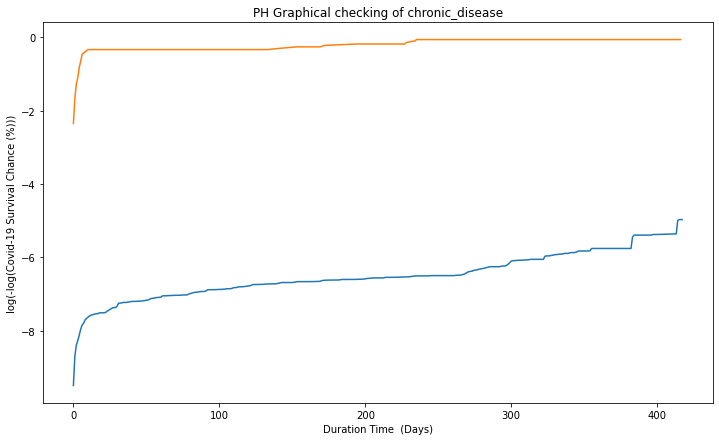

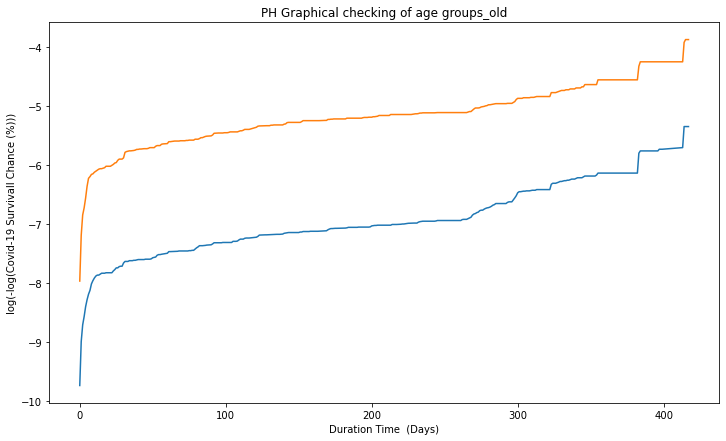

In [485]:
def graphical_checking_PH(feature, t='duration', event='is_dead', df=covid2_train, ax=None):
    for cat in df[feature].unique():
        idx = df[feature] == cat
        kmf = lifelines.KaplanMeierFitter()
        kmf.fit(df[idx][t], event_observed=df[idx][event], label=cat)
        kmf_surv = kmf.survival_function_.reset_index()
        plt.plot(kmf_surv.timeline,np.log(-np.log(kmf_surv[cat])),label = cat)

# plot by high-tech
fig, ax = plt.subplots(figsize=(12,7))
graphical_checking_PH(feature='chronic_disease_binary_True', ax=ax)
ax.set_title('PH Graphical checking of chronic_disease')
ax.set_xlabel('Duration Time  (Days)')
ax.set_ylabel('log(-log(Covid-19 Survival Chance (%)))')
plt.show()

# plot by region_US
fig, ax = plt.subplots(figsize=(12,7))
graphical_checking_PH(feature='age groups_old', ax=ax)
ax.set_title('PH Graphical checking of age groups_old')
ax.set_xlabel('Duration Time  (Days)')
ax.set_ylabel('log(-log(Covid-19 Survivall Chance (%)))')
plt.show()

In [486]:
startup_US = covid2_train[['male','duration','is_dead']]
startup_US_cph = lifelines.CoxPHFitter()

startup_US_cph.fit(startup_US, duration_col='duration', event_col='is_dead', show_progress=False)
startup_US_cph.print_summary()

<lifelines.CoxPHFitter: fitted with 372063 total observations, 371179 right-censored observations>
             duration col = 'duration'
                event col = 'is_dead'
      baseline estimation = breslow
   number of observations = 372063
number of events observed = 884
   partial log-likelihood = -10947.01
         time fit was run = 2021-03-16 21:11:15 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
male        0.43       1.54       0.07             0.29             0.57                 1.34                 1.76

             z      p   -log2(p)
covariate                       
male      6.16 <0.005      30.40
---
Concordance = 0.55
Partial AIC = 21896.01
log-likelihood ratio test = 39.14 on 1 df
-log2(p) of ll-ratio test = 31.24

In [487]:
# #check assumption
# startup_cph.check_assumptions(covid2_train, p_value_threshold=0.05, show_plots=True)